
# Metaheuristics - lecture XYZ

## Objectives
* Getting familiar with different classes of optimization problems

## Continuous optimization problems

Local optimization:  for a function $f:D\to R$, $D=[a_1,b_1]\times [a_2,b_2]\times \ldots \times [a_n,b_n]$, find $x^*\in D$,  such that $f(x^*)\leq f(x)$ for all $x\in D$

Test functions
* Sphere function (uni-modal, convex function) $f:R^n\rightarrow R$, $f(x^1,\ldots, x^n)=\sum_{i=1}^n (x^i)^2$ (unique optimum)

* Griewank function (uni-modal, non-convex function) $f:R^n\rightarrow R$, $f(x^1\ldots, x^n)= 1 + \sum_{i=1}^{n} (x^i)^2/4000 - \prod_{i=1}^{n} \cos(x^i)/\sqrt(i)$ 

* Rastrigin function (multi-modal) $f:R^n\rightarrow R$, $f(x^1\ldots, x^n)=10 n + \sum_{i=1}^{n} ((x^i)^2 - 10 \cos(2\pi x^i))$


More details: https://www.sfu.ca/~ssurjano/optimization.html


## Problem statement
Implement a GA for function optimisation: identify the optimal point of f(x). 



**Function ladscape**

Define the function and plot it in order to observe its shape/aspect and optimal points

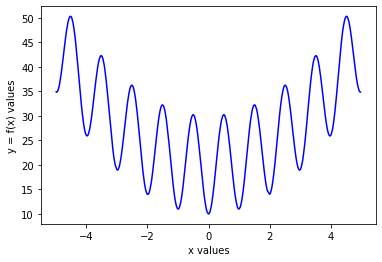

In [3]:
# define the function
import math
import numpy as np 

MIN = -5
MAX = 5

def fcEval(x):
    # sphere function 
    # val = sum(xi ** 2 for xi in x)

    # Rastrigin function 
    term1 = sum(xi ** 2 / 4000 for xi in x)
    cosinus = np.cos([xi for xi in x])
    cosinus = [cosinus[i] / math.sqrt(i + 1) for i in range(len(x))]
    term2 = np.prod([c for c in cosinus], axis = 0)
    val = term1 - term2 + 1
    val = 20 + sum(xi ** 2 - 10 * np.cos(2 * np.pi * xi) for xi in x)
    
    return val
 
# define a generator of values
from random import uniform, randint
from fcOptimisGA.utils import generateNewValue

#  plot the 1D function (n = 1) (see how the search space looks)
import matplotlib.pyplot as plt

noDim = 1
xref =  [[generateNewValue(MIN, MAX)  for _ in range(noDim)] for _ in range(0, 1000)]
xref.sort()
yref = [fcEval(xi) for xi in xref]   

plt.plot(xref, yref, 'b-')
plt.xlabel('x values')
plt.ylabel('y = f(x) values')
plt.show()



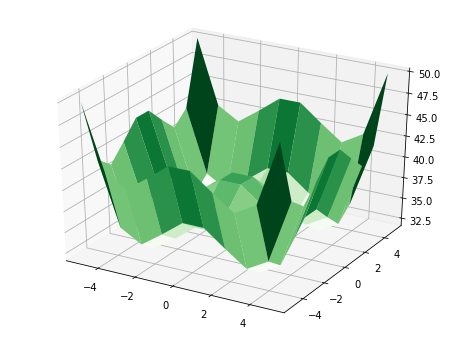

In [4]:
# plot a 2D function
    
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

MIN = -5
MAX = 5
noDim = 2

x = [np.linspace(MIN, MAX, 10) for _ in range(noDim)]
x1, x2 = np.meshgrid(x[0], x[1])
y = fcEval([x1, x2])
fig = plt.figure(figsize = (8,6)) 
ax = plt.axes(projection='3d') 

ax.plot_surface(x1, x2, y, rstride=1, cstride=1, cmap='Greens', linewidth=0.08, antialiased=True)  
 
plt.show()


**GA running**

Use the GA (with real encoding) for identify the optimal solution


In [5]:


from random import randint

class GA:
    def __init__(self, param = None, problParam = None):
        self.__param = param
        self.__problParam = problParam
        self.__population = []
        
    @property
    def population(self):
        return self.__population
    
    def initialisation(self):
        for _ in range(0, self.__param['popSize']):
            c = Chromosome(self.__problParam)
            self.__population.append(c)
    
    def evaluation(self):
        for c in self.__population:
            c.fitness = self.__problParam['function'](c.repres)
            
    def bestChromosome(self):
        best = self.__population[0]
        for c in self.__population:
            if (c.fitness < best.fitness):
                best = c
        return best
        
    def worstChromosome(self):
        best = self.__population[0]
        for c in self.__population:
            if (c.fitness > best.fitness):
                best = c
        return best

    def selection(self):
        pos1 = randint(0, self.__param['popSize'] - 1)
        pos2 = randint(0, self.__param['popSize'] - 1)
        if (self.__population[pos1].fitness < self.__population[pos2].fitness):
            return pos1
        else:
            return pos2 
        
    
    def oneGeneration(self):
        newPop = []
        for _ in range(self.__param['popSize']):
            p1 = self.__population[self.selection()]
            p2 = self.__population[self.selection()]
            off = p1.crossover(p2)
            off.mutation()
            newPop.append(off)
        self.__population = newPop
        self.evaluation()

    def oneGenerationElitism(self):
        newPop = [self.bestChromosome()]
        for _ in range(self.__param['popSize'] - 1):
            p1 = self.__population[self.selection()]
            p2 = self.__population[self.selection()]
            off = p1.crossover(p2)
            off.mutation()
            newPop.append(off)
        self.__population = newPop
        self.evaluation()
        
    def oneGenerationSteadyState(self):
        for _ in range(self.__param['popSize']):
            p1 = self.__population[self.selection()]
            p2 = self.__population[self.selection()]
            off = p1.crossover(p2)
            off.mutation()
            off.fitness = self.__problParam['function'](off.repres)
            worst = self.worstChromosome()
            if (off.fitness < worst.fitness):
                worst = off        

In [6]:


def plotAFunction(xref, yref, x, y, xoptimal, yoptimal, message):    
    plt.plot(xref, yref, 'b-')
    plt.plot(x, y, 'ro', xoptimal, yoptimal, 'bo')
    plt.title(message)
    plt.show()
    plt.pause(0.9)
    plt.clf()


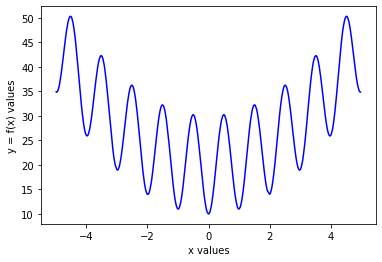

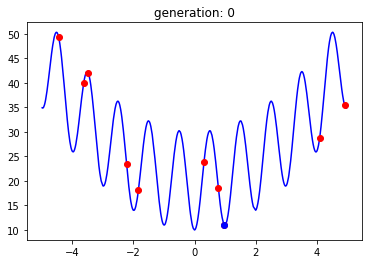

Best solution in generation 0 is: x = [1.1328125] f(x) = 14.567674611686064


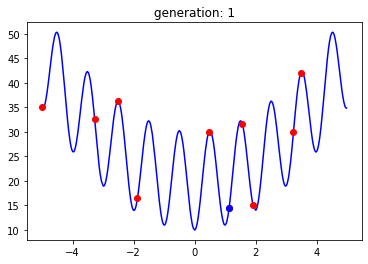

Best solution in generation 1 is: x = [0.9375] f(x) = 11.640110924887136


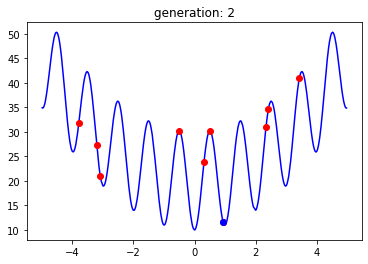

Best solution in generation 2 is: x = [0.15625] f(x) = 14.468711732303976


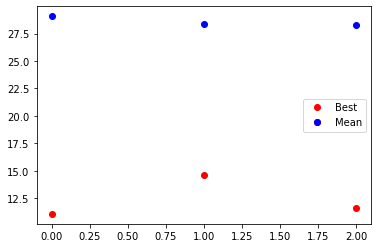

In [7]:
# from fcOptimisGA.RealChromosome import Chromosome
from fcOptimisGA.BinChromosome import Chromosome
from random import seed 

seed(1)

# plot the function to be optimised
noDim = 1
xref =  [[generateNewValue(MIN, MAX)  for _ in range(noDim)] for _ in range(0, 1000)]
xref.sort()
yref = [fcEval(xi) for xi in xref]   
plt.ion()
plt.plot(xref, yref, 'b-')
plt.xlabel('x values')
plt.ylabel('y = f(x) values')
plt.show()

# initialise de GA parameters
gaParam = {'popSize' : 10, 'noGen' : 3, 'pc' : 0.8, 'pm' : 0.1}
# problem parameters
problParam = {'min' : MIN, 'max' : MAX, 'function' : fcEval, 'noDim' : noDim, 'noBits' : 8}

# store the best/average solution of each iteration (for a final plot used to anlyse the GA's convergence)
allBestFitnesses = []
allAvgFitnesses = []
generations = []


ga = GA(gaParam, problParam)
ga.initialisation()
ga.evaluation()
    
for g in range(gaParam['noGen']):
    #plotting preparation
    allPotentialSolutionsX = [c.repres for c in ga.population]
    allPotentialSolutionsY = [c.fitness for c in ga.population]
    bestSolX = ga.bestChromosome().repres
    bestSolY = ga.bestChromosome().fitness
    allBestFitnesses.append(bestSolY)
    allAvgFitnesses.append(sum(allPotentialSolutionsY) / len(allPotentialSolutionsY))
    generations.append(g)
    plotAFunction(xref, yref, allPotentialSolutionsX, allPotentialSolutionsY, bestSolX, [bestSolY], 'generation: ' + str(g))

    #logic alg
    ga.oneGeneration()
    # ga.oneGenerationElitism()
    # ga.oneGenerationSteadyState()
    
    bestChromo = ga.bestChromosome()
    print('Best solution in generation ' + str(g) + ' is: x = ' + str(bestChromo.repres) + ' f(x) = ' + str(bestChromo.fitness))
    
plt.ioff()
best, = plt.plot(generations, allBestFitnesses, 'ro', label = 'best')
mean, = plt.plot(generations, allAvgFitnesses, 'bo', label = 'mean')
plt.legend([best, (best, mean)], ['Best', 'Mean'])
plt.show()
 